In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
 
print('y_train shape', y_train.shape)

print(x_test.shape[0], 'test samples')
print('x_test shape', x_test.shape)

print(y_test.shape[0], 'test samples')
 

In [0]:
batch_size = 32 
epochs = 20
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [0]:
  def plot_images(x, y, number_of_images=3):
    fig, axes1 = plt.subplots(number_of_images,number_of_images,figsize=(10,10))
    for j in range(number_of_images):
      for k in range(number_of_images):
        i = np.random.choice(range(len(x)))
        title = class_names[y[i:i+1][0][0]]
        axes1[j][k].title.set_text(title)
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x[i:i+1][0])        


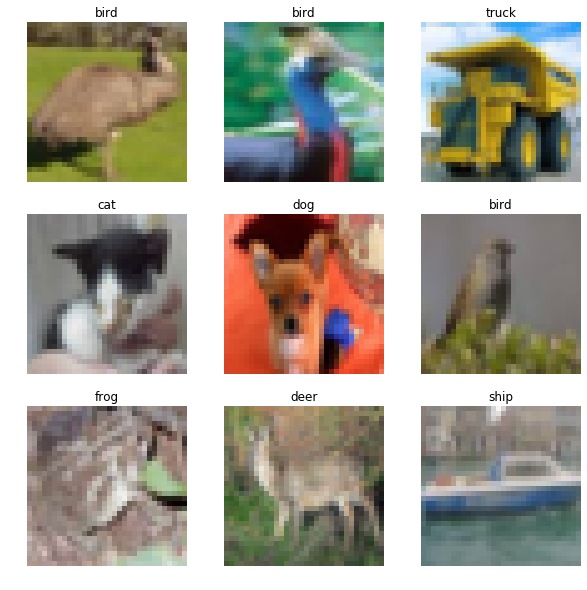

In [31]:
plot_images(x_train,y_train)

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

In [34]:
#Train model

model.fit(x_train / 255.0, tf.keras.utils.to_categorical(y_train),
          batch_size=batch_size,
          shuffle=True,
          epochs=epochs,
          validation_data=(x_test / 255.0, tf.keras.utils.to_categorical(y_test))
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 189us/sample - loss: 1.6451 - acc: 0.4069 - val_loss: 1.3598 - val_acc: 0.5206
Epoch 2/20
50000/50000 [==============================] - 9s 183us/sample - loss: 1.3235 - acc: 0.5297 - val_loss: 1.2154 - val_acc: 0.5794
Epoch 3/20
50000/50000 [==============================] - 9s 183us/sample - loss: 1.1884 - acc: 0.5816 - val_loss: 1.1419 - val_acc: 0.6047
Epoch 4/20
50000/50000 [==============================] - 9s 184us/sample - loss: 1.1002 - acc: 0.6141 - val_loss: 1.0685 - val_acc: 0.6287
Epoch 5/20
50000/50000 [==============================] - 9s 185us/sample - loss: 1.0292 - acc: 0.6398 - val_loss: 1.0118 - val_acc: 0.6500
Epoch 6/20
50000/50000 [==============================] - 9s 184us/sample - loss: 0.9748 - acc: 0.6587 - val_loss: 0.9644 - val_acc: 0.6618
Epoch 7/20
50000/50000 [==============================] - 9s 183us/sample - loss: 0.9213 - acc: 0.6819 - val_l

In [35]:
#Evaluate model

scores = model.evaluate(x_test / 255.0, tf.keras.utils.to_categorical(y_test))
 
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 1s 103us/sample - loss: 0.8062 - acc: 0.7281
Loss: 0.806
Accuracy: 0.728


### If no. of epochs are more then accuracy is also more but it takes more time so I take epoch = 20